# **Project Title**: Detecting Insults in Social Commentary

## **Description:**
In today's digital age, online discussions and social media have become an integral part of our lives. However, with the convenience of online communication comes the challenge of moderating and ensuring respectful discourse. This project aims to address a critical issue: **detecting and identifying insulting comments in social commentary**.

The project focuses on the task of identifying comments that are intended to insult or demean participants in a conversation. These comments may contain profanity, offensive language, racial slurs, or other forms of disrespect. It's **important to note** that we are specifically interested in comments that target participants of the discussion, not public figures or celebrities.

## **Project Objectives**

1. **Classifier Development:** The primary objective is to build a machine learning classifier that can accurately predict whether a given comment is insulting. This classifier should assign a probability score to each comment, indicating the likelihood of it being an insult.
2. **Accuracy Priority:** Maximize accuracy while minimizing false positives and false negatives, achieving a balanced model.

3. **Real-time Detection:** Develop a near-real-time model for automatic insult detection in online conversations.

4. **Generalization:** Ensure the model handles diverse insults, including explicit and subtle forms, promoting generalizability.

5. **Data Privacy:** Adhere to strict data protection standards, using comments solely for moderation purposes.

6. **Scalable Solution:** Create a scalable system to process high volumes of user-generated content efficiently.

7. **Ethical Compliance:** Address ethical concerns, including potential biases and fairness in the insult detection system.

8. **Collaboration:** Collaborate with online platforms and communities for system implementation and refinement.

## **Data Understanding**

To begin the project, let's analyze the available data. We'll create dataframes with the necessary input files, explore the data, and describe all the columns. Understanding the data is essential for developing an effective insult detection model.

In [1]:
import pandas as pd




In [2]:
# Load the datasets
verification_set = pd.read_csv('dataset/impermium_verification_set.csv')
verification_labels = pd.read_csv('dataset/impermium_verification_labels.csv')
test = pd.read_csv('dataset/test.csv')
test_with_solutions = pd.read_csv('dataset/test_with_solutions.csv')
train = pd.read_csv('dataset/train.csv')
sample_submission_null = pd.read_csv('dataset/sample_submission_null.csv')



### **Dataset Explanations**

#### **Verification Set (`verification_set`)**:
This dataset is used for verification purposes during model development and testing.




In [3]:
# Print the first 10 rows of the verificationSet DataFrame
print("verification_set:")
print(verification_set.head(10))

verification_set:
   id  Insult             Date  \
0   1     NaN  20120603163526Z   
1   2     NaN  20120531215447Z   
2   3     NaN  20120823164228Z   
3   4     NaN  20120826010752Z   
4   5     NaN  20120602223825Z   
5   6     NaN  20120603202442Z   
6   7     NaN  20120603163604Z   
7   8     NaN  20120602223902Z   
8   9     NaN  20120528064125Z   
9  10     NaN  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  PrivateTe

#### **Verification Labels (`verification_labels`)**:
This dataset provides labels for the 'verification_set,' with '0' indicating non-insulting and '1' indicating insulting comments.


In [4]:
# Print the first 10 rows of the verification labels
print("verification_labels:")
print(verification_labels.head(10))

verification_labels:
   id  Insult             Date  \
0   1       0  20120603163526Z   
1   2       1  20120531215447Z   
2   3       1  20120823164228Z   
3   4       1  20120826010752Z   
4   5       1  20120602223825Z   
5   6       0  20120603202442Z   
6   7       1  20120603163604Z   
7   8       0  20120602223902Z   
8   9       0  20120528064125Z   
9  10       1  20120603071243Z   

                                             Comment        Usage  
0                 "like this if you are a tribe fan"  PrivateTest  
1              "you're idiot......................."  PrivateTest  
2  "I am a woman Babs, and the only "war on women...  PrivateTest  
3  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...  PrivateTest  
4  "haha green me red you now loser whos winning ...  PrivateTest  
5  "\nMe and God both hate-faggots.\n\nWhat's the...  PrivateTest  
6  "Oh go kiss the ass of a goat....and you DUMMY...  PrivateTest  
7                  "Not a chance Kid, you're wrong."  Privat

#### **Test (`test`)**:
The main test dataset used to make predictions with the trained machine learning model.

In [5]:
# Print the first 10 rows of the test data frame
print("test:")
print(test.head(10))

test:
   id             Date                                            Comment
0   1  20120603163526Z                 "like this if you are a tribe fan"
1   2  20120531215447Z              "you're idiot......................."
2   3  20120823164228Z  "I am a woman Babs, and the only "war on women...
3   4  20120826010752Z  "WOW & YOU BENEFITTED SO MANY WINS THIS YEAR F...
4   5  20120602223825Z  "haha green me red you now loser whos winning ...
5   6  20120603202442Z  "\nMe and God both hate-faggots.\n\nWhat's the...
6   7  20120603163604Z  "Oh go kiss the ass of a goat....and you DUMMY...
7   8  20120602223902Z                  "Not a chance Kid, you're wrong."
8   9  20120528064125Z            "On Some real Shit FUck LIVE JASMIN!!!"
9  10  20120603071243Z  "ok but where the hell was it released?you all...


#### **Test with Solutions (`test_with_solutions`):**
Similar to the "test" dataset, but includes the ground truth or correct answers (solutions) for evaluation purposes. Used to assess model performance after predictions are made.

In [6]:
# Print the first 10 rows of the test_with_solutions data frame
print("test_with_solutions:")
print(test_with_solutions.head(10))

test_with_solutions:
   Insult             Date                                            Comment  \
0       0              NaN  "THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...   
1       0  20120618222256Z  "@ian21\xa0"Roger Clemens is the fucking man, ...   
2       1  20120618213617Z  "Agree with Alan you are an extremest idiot.  ...   
3       0              NaN  "Really?\\n\\nI see Marc Lamont Hill on variou...   
4       0  20120620003825Z  "Really suck isn't the word, when many of our ...   
5       0              NaN  "...after a couple guys like him rape him firs...   
6       0  20120529201500Z   "Matthews mentored Perry at USC.  Bodes well..."   
7       0  20120619145613Z  "How about we accept facts and patiently wait ...   
8       1  20120609165037Z  "To engage in an intelligent debate with you i...   
9       0  20120612145537Z  "Same reason no one cared Obama did cocaine, w...   

         Usage  
0   PublicTest  
1   PublicTest  
2   PublicTest  
3  PrivateTest  
4 

#### **Train (`train`)**:
The training dataset used for training the machine learning model. It contains labeled data (comments with known insult labels) to develop and train the insult detection model.

In [7]:
# Print the first 10 rows of the train data frame
print("train:")
print(train.head(10))

train:
   Insult             Date                                            Comment
0       1  20120618192155Z                               "You fuck your dad."
1       0  20120528192215Z  "i really don't understand your point.\xa0 It ...
2       0              NaN  "A\\xc2\\xa0majority of Canadians can and has ...
3       0              NaN  "listen if you dont wanna get married to a man...
4       0  20120619094753Z  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
5       0  20120620171226Z  "@SDL OK, but I would hope they'd sign him to ...
6       0  20120503012628Z                      "Yeah and where are you now?"
7       1              NaN  "shut the fuck up. you and the rest of your fa...
8       1  20120502173553Z  "Either you are fake or extremely stupid...may...
9       1  20120620160512Z  "That you are an idiot who understands neither...


#### **Sample Submission Null (`sample_submission_null`)**:
Provides a sample submission format to guide participants in formatting their predictions correctly when submitting to the competition.


In [8]:
# Print the first 10 rows of the sample_submission_null data frame
print("sample_submission_null:")
print(sample_submission_null.head(10))

sample_submission_null:
   Insult             Date                                            Comment
0       0              NaN  "THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...
1       0  20120618222256Z  "@ian21\xa0"Roger Clemens is the fucking man, ...
2       0  20120618213617Z  "Agree with Alan you are an extremest idiot.  ...
3       0              NaN  "Really?\\n\\nI see Marc Lamont Hill on variou...
4       0  20120620003825Z  "Really suck isn't the word, when many of our ...
5       0              NaN  "...after a couple guys like him rape him firs...
6       0  20120529201500Z   "Matthews mentored Perry at USC.  Bodes well..."
7       0  20120619145613Z  "How about we accept facts and patiently wait ...
8       0  20120609165037Z  "To engage in an intelligent debate with you i...
9       0  20120612145537Z  "Same reason no one cared Obama did cocaine, w...


For the next step, we will focus solely on the 'train' dataset as we prepare to preprocess the data. To help with that, we will be using the Natural Language Toolkit (NLTK) package, an open-source Python library for natural language processing

In [9]:
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization

We extract positive and negative comments to two separate data frames.

In [10]:
# Extract positive comments (Insult = 1) and select the 'Comment' column
positive_comments = train[train['Insult'] == 1]['Comment']

# Extract negative comments (Insult = 0) and select the 'Comment' column
negative_comments = train[train['Insult'] == 0]['Comment']

comments = train[['Insult', 'Comment']].copy()
print(comments)

      Insult                                            Comment
0          1                               "You fuck your dad."
1          0  "i really don't understand your point.\xa0 It ...
2          0  "A\\xc2\\xa0majority of Canadians can and has ...
3          0  "listen if you dont wanna get married to a man...
4          0  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...
...      ...                                                ...
3942       1  "you are both morons and that is never happening"
3943       0  "Many toolbars include spell check, like Yahoo...
3944       0  "@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...
3945       0  "How about Felix? He is sure turning into one ...
3946       0  "You're all upset, defending this hipster band...

[3947 rows x 2 columns]


In [11]:
print(len(positive_comments))
print(len(negative_comments))



1049
2898


Next, we will develop a text preprocessing function that will be applied to the comment text.

In [12]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

# Remove hyperlinks, Twitter marks and styles

In [13]:
# Printing positive comments containing specific characters like '@' and 'https' to take as a sample
print(positive_comments[positive_comments.str.contains('@|https', case=False)])


248     "yeah I'm pathetic but your the idiot going ar...
761     "@peter8888,\n\nYou showed your true colors. I...
835     "Bitch, you replied to my comment, you stupid ...
1009    "Yo\xa0@LukeEmery:disqus\xa0you must be too du...
1078    "@berethor099 Go ahead and try, dude. Go - fuc...
1145    "@Pickle\n\nYou look like Brian Scalabrine's b...
1428    "@TeeBooWa\n\xa0HAH YOUR'E ONLY 14? FPFF AND Y...
1585    "Why don't you take your pathetic intimidation...
1612               "@justin_mia Perkins is a knucklehead"
1917    "YOU ARE THE REAL @SSHO LE AND I HOPE PEOPLE O...
2029    "@Hoss \xa0\xa0@JenBroflovski\xa0fuck you you ...
2076               "@caljb7 i'm on AAC then ya dumb fuck"
2105    "@Enundr\xa0lol.....You sir, are a jackass. wi...
2456                   "@FUCK:disqus\xa0YOU CNN FAGGOTS."
3079    "@cnn-fcbba858f167b1594a66777bca:disqus \n\nYo...
3100    "@Bexxcc\xa0\xa0@bubzsucz\n\xa0YOU'RE THE SICK...
3174    "@lazerbyte Shut the fuck up -_- so where do y...
3279    "not f

In [14]:
# We take a sample comment
comment = positive_comments[1078]
print(comment)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."


In [15]:
# We download the stopwords from Natural Language Toolkit

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
print('\033[92m' + comment)
print('\033[94m')

# remove the "" from the end and start of the sentences
comment1 = comment.strip('"')

# remove hyperlinks
comment1 = re.sub(r'https?://[^\s\n\r]+', '', comment1)

# only removing the hash # sign from the word
comment1 = re.sub(r'#', '', comment1)

print(comment1)

"@berethor099 Go ahead and try, dude. Go - fucking - ahead."

@berethor099 Go ahead and try, dude. Go - fucking - ahead.


Remove unwanted characters, replace certain words and phrases

In [17]:
import re

def preprocessing(sentence):
    cleanr = re.compile('<.*?>')

    regex = "[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    regex1 = "(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][" \
             "a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2," \
             "}|www\.[a-zA-Z0-9]\.[^\s]{2,}) "
    regex2 = "(www | http: | https:)+[ ^\s]+[\w]"
    regex3 = r'\b\w*\d+\w*\b'
    s0 = sentence

    s0 = s0.lower()
    s0 = s0.replace("\\\\n", " ")
    s0 = s0.replace("\\n", " ")
    s0 = s0.replace("\\t", " ")
    s0 = s0.replace("\\\\xc2", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\\\xa0", " ")
    s0 = s0.replace("\\[\\w]", ' ')
    s0 = re.sub(r"\\[a-zA-Z0-9.]*", "", s0)

    s0 = re.sub("([a-zA-Z0-9.?!#*])\\1\\1+", "\\1", s0)  # brooooook->brook

    s0 = re.sub(regex, "", s0)  # url
    s0 = re.sub(r'http\S+|www\S+', '', s0)
    s0 = re.sub(regex1, "", s0)
    s0 = re.sub(cleanr, '', s0)  # html tags
    # Use re.sub to replace matched usernames with an empty string
    s0 = re.sub(regex3, "", s0)  # username

    # string = ":-/)"
    # ##  REMOVING SMILEYS
    # s0=re.sub(string,"  smiley",s0);
    # # s0=re.sub("\[\]+","",s0)            #remove \
    s0 = s0.strip()
    s0 = s0.replace(" wont ", " will not ")
    s0 = s0.replace(" won't ", " will not ")
    s0 = s0.replace(" don't ", " do not ")
    s0 = s0.replace(" didn't ", " did not ")
    s0 = s0.replace("Didn't ", "Did not ")
    s0 = s0.replace(" i'll", " I will")
    s0 = s0.replace(" I'll", " I will")
    s0 = s0.replace("I'll", "I will")
    s0 = s0.replace(" can't", " cannot")
    s0 = s0.replace(" shouldn't", " should not")
    s0 = s0.replace(" im ", " i am ")
    s0 = s0.replace("ain't", "is not")
    s0 = s0.replace("'ll", " will")
    s0 = s0.replace("'t[. ]", " not")
    s0 = s0.replace(" u ", " you ")
    s0 = s0.replace(" r ", " are ")
    s0 = s0.replace(" m ", " am ")
    s0 = s0.replace(" u'r ", " you are ")
    s0 = s0.replace(" you'r ", "you are ")
    s0 = s0.replace("'ve", " have")
    s0 = s0.replace("'s", " is")
    s0 = s0.replace("'re", " are")
    s0 = s0.replace("'d", " would")
    s0 = s0.replace("rly", " really")
    s0 = s0.replace(" fu ", " fuck you")
    s0 = re.sub("([a-zA-Z0-9.]+)\\1\\1+", " ", s0)  # lolololol->lol
    s0 = re.sub("[&*?!#^%`~$@]{4}", "-TOKEN-", s0)  # &*$!^@->>>>token
    s0 = s0.strip()
    s0 = re.sub(r'[@#][\w.]*', "-PRON-", s0)  # @username with YOU

    
    return s0

# Test the function
preprocessing("https://www.linkedin.com/feed/")


''

In [18]:
# for comment in positive_comments:
#     preprocessing(comment)

preprocessing('skander123')

''

# Tokenize the string

In [19]:
print('\033[92m' + comment1)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
comment_tokens = tokenizer.tokenize(comment1)

print('Tokenized string:')
print(comment_tokens)

@berethor099 Go ahead and try, dude. Go - fucking - ahead.

Tokenized string:
['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']


# Remove stop words and punctuations

In [20]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We might need to customize the stop words list for our applications. Since the model should diffrenciate between insults to users of the forum and others.

In [21]:
print('\033[92m')
print(comment_tokens)
print('\033[94m')
comment_clean = []

for word in comment_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        comment_clean.append(word)

print('Removed stop words and punctuation:')
print()
print(comment_clean)


['go', 'ahead', 'and', 'try', ',', 'dude', '.', 'go', '-', 'fucking', '-', 'ahead', '.']

Removed stop words and punctuation:

['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']


# Stemming
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

In [22]:
print('\033[92m')
print(comment_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
comment_stem = []

for word in comment_clean:
    stem_word = stemmer.stem(word)  # stemming word
    comment_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(comment_stem)


['go', 'ahead', 'try', 'dude', 'go', 'fucking', 'ahead']

stemmed words:
['go', 'ahead', 'tri', 'dude', 'go', 'fuck', 'ahead']


# process_comment()
Now we will create the process_comment() function that sums all the steps mentioned in the previous steps

In [23]:
def process_comment(df):
    # Iterate through the 'Comment' column in the DataFrame
    for index, row in df.iterrows():
        comment = row['Comment']
        comment1 = preprocessing(comment)  # Apply your preprocessing function to the comment
        comment1 = comment1.strip('"')
        comment_tokens = tokenizer.tokenize(comment1)
        comment_clean = []

        for word in comment_tokens:
            if (word not in stopwords_english and
                    word not in string.punctuation):
                comment_clean.append(word)

        comment_stem = []

        for word in comment_clean:
            stem_word = stemmer.stem(word)
            comment_stem.append(stem_word)

        # Overwrite the 'Comment' column in the DataFrame with the processed comment
        df.at[index, 'Comment'] = ' '.join(comment_stem)

    return df


Let's test our function


In [24]:
# Pick a random test
##print(process_comment(comments))
print(comments['Comment'][4])

"C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1eddng bi\u1ec3u t\xecnh 2011 c\xf3 \xf4n ho\xe0 kh\xf4ng ? \nC\xe1c ng\u01b0 d\xe2n ng\u1ed3i cu\xed \u0111\u1ea7u chi\u1ee5 nh\u1ee5c c\xf3 \xf4n ho\xe0 kh\xf4ng ?\nC\xe1c n\xf4ng d\xe2n gi\u1eef \u0111\u1ea5t \u1edf V\u0103n Giang, C\u1ea7n Th\u01a1 c\xf3 \xf4n ho\xe0 kh\xf4ng ?\n.................\nR\u1ed1t cu\u1ed9c \u0111\u01b0\u1ee3c g\xec\xa0 th\xec ch\xfang ta \u0111\xe3 bi\u1ebft !\nAi c\u0169ng y\xeau chu\u1ed9ng ho\xe0 b\xecnh, nh\u01b0ng \u0111\xf4i khi ho\xe0 b\xecnh ch\u1ec9 th\u1eadt s\u1ef1 \u0111\u1ebfn sau chi\u1ebfn tranh m\xe0 th\xf4i.\nKh\xf4ng c\xf2n con \u0111\u01b0\u1eddng n\xe0o ch\u1ecdn kh\xe1c \u0111\xe2u, \u0111\u1eebng m\u01a1 th\xeam n\u01b0\xe3."


In [25]:
from sklearn.base import BaseEstimator
import numpy as np


class CleanTransformer(BaseEstimator):

    def __init__(self):
        with open('badlist.txt') as file:
            badwords = [line.strip() for line in file.readlines()]
        self.badwords = badwords

    def fit(self):
        return self

    def transform(self, docs):
        n_words = []
        n_chars = []
        caps_ratio = []

        for doc in docs:
            n_words.append(len(doc.split()))
            n_chars.append(len(doc))

            caps_ratio.append(np.sum([c.isupper() for c in doc]) / len(doc))

        return np.array([n_words, n_chars, caps_ratio]).T

In [26]:
from sklearn.base import BaseEstimator
import spacy
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
nlp = spacy.load('en_core_web_sm')

In [27]:
def fetchlist(file):
    filecontent = open(file)
    lines = filecontent.readlines()
    l = []
    for line in lines:
        l.append(line.strip())
    # print(list)
    return l

In [28]:
def customfind(sent, phrase):
    pp = phrase.split(" ")
    if len(pp) > 1:
        if sent.find(phrase) != -1:
            return True;
    else:
        words = sent.split(" ")
        for word in words:
            if (word == phrase):
                return True
    return False

In [29]:
class CleanTransformer(BaseEstimator):
    def __init__(self):
        self.badlist = fetchlist('sortedBadWords_for_checking.txt')
        self.goodlist = fetchlist('positives.txt')

    #         with open('badlist.txt') as file:
    #             badwords = [line.strip() for line in file.readlines()]
    #         self.badwords = badwords

    def get_feature_names(self):
        return np.array(['bcount', 'bratio', 'gcount', 'gratio', 'bgratio', 'len_ratio',
                         'caps_ratio', 'off_score', 'lex1', 'lex2'])

    def fit(self):
        return self

    def transform(self, docs):
        bcount = []
        bratio = []
        gcount = []
        gratio = []
        bgratio = []
        len_ratio = []
        caps_ratio = []
        off_score = []
        lex1 = []
        lex2 = []

        for i, doc in enumerate(docs):
            print(i, doc)
            #             bcount_ ,bratio_ = self._bad_count(doc, self.badlist)
            #             bcount.append(bcount_)
            #             bratio.append(bratio_)

            #             gcount_ ,gratio_ = self._good_count(doc, self.goodlist)
            #             gcount.append(gcount_)
            #             gratio.append(gratio_)

            #             bgratio.append(bcount_ / float(gcount_))

            #             len_ratio.append(self._sent_len_ratio(doc, 50))

            #             caps_ratio.append(self._caps_ratio(doc))
            send_list = [0, 1.5, .6, 0, 1, .4, .6, .3, .15, .8, .45]
            off_score.append(self._offense_score(doc, send_list, self.badlist, self.goodlist))
        # lex1.append(self._lex_score1(doc, self.badlist))
        #             lex2.append(self._lex_score2(doc, self.badlist))



        #             n_words.append(len(doc.split()))
        #             n_chars.append(len(doc))
        #             caps.append()
        #             caps_ratio.append(np.sum([c.isupper() for c in doc]) / len(doc))

        return np.array([bcount, bratio, gcount, gratio,
                         bgratio, len_ratio, caps_ratio, off_score, lex1, lex2]).T

    def _bad_count(self, document, badlist):
        count = 0
        for phrase_ in badlist:
            if customfind(document, phrase_):
                # print(phrase_)
                count = count + 1
        wl = len(word_tokenize(document))
        if wl == 0:
            print(document)
        return [count, count * 10 / float(wl)]

    def _good_count(self, document, goodlist):
        count = 1
        for phrase_ in goodlist:
            if customfind(document, phrase_):
                count = count + 1
        return [count, count * 10 / float(word_tokenize(document).__len__())]

    def _sent_len_ratio(self, sentence, shortis):
        short_sent = 0
        sent_tokens = sent_tokenize(sentence)
        for sent in sent_tokens:
            if len(sent) <= shortis:
                short_sent = short_sent + 1
        return float(short_sent) / sent_tokens.__len__()

    def _caps_ratio(self, document):
        uc_token = 0
        w_tokens = word_tokenize(document)
        words_analysed = 0
        # print(w_tokens)
        for word in w_tokens:
            # print(word)
            if len(word) > 1 and (
                                                            word != "'s" and word != "'S" and word != "'ll" and word != "'LL" and word != "n't" and word != "N'T" and word != "'re" and word != "'RE" and word != "'d" and word != "'D" and word != "'ve" and word != "'VE"):
                words_analysed = words_analysed + 1
                if word.isupper():
                    uc_token = uc_token + 1
                    # print(word, words_analysed, uc_token)
        val = uc_token / float(words_analysed)
        return val

    def _offense_score(self, document, in_list, badlist, goodlist):
        s1 = in_list[0]
        s2 = in_list[1]
        s3 = in_list[2]
        s4 = in_list[3]
        s5 = in_list[4]
        s6 = in_list[5]
        s7 = in_list[6]
        s8 = in_list[7]
        s9 = in_list[8]
        s10 = in_list[9]
        s11 = in_list[10]
        # s1 -for not in sibling -0
        # s2 -for you in sibling -1.5
        # s3 -for they in sibling -0.6
        # s4 -for 'nor, neither' in descendant -0
        # s5 -for you in descendant -1
        # s6 -for they in descendant -0.4
        # s7 -for you in parent's child -.6
        # s8 - for they in parent's child - .3
        # s9 - for otherwise -.2
        # s10 -for niece you - .8
        # s11 -for niece they - .45

        wordlist = ['yourself', 'your', 'yours', 'you', 'he', 'her', 'she', 'his', 'they', 'their', 'them', 'not',
                    'never', 'nobody', 'neither', 'nor', 'it', 'its']
        document = document.lower()
        doc = nlp(document)
        sentences_in_doc = doc.sents
        # print(doc)
        Flag = False
        # displacy.serve(doc, style='dep')
        score = 0
        token_no = 0
        for token in doc:
            # check if token is a curse word
            Flag = False
            stemmedword = ps.stem(token.text)
            if token_no + 1 < len(doc) and doc[token_no + 1].text in goodlist:
                Flag = True
            else:
                break
            if Flag:
                continue
            for child in token.head.children:
                if child.text == 'not' or child.text == 'never' or child.text == 'nobody':
                    score = score + s1
                    Flag = True
                    break
            if Flag: continue
            for child in token.head.children:

                if child.text == 'you' or child.text == 'yourself' or child.text == 'your' or child.text == 'yours' or child.text == 'it' or child.text == 'its':
                    score = score + s2
                    # print("Rule--",child)
                    Flag = True
                    break
            if Flag: continue
            for child in token.head.children:
                if child.text == 'they' or child.text == 'he' or child.text == 'she' or child.text == 'her' or child.text == 'their' or child.text == 'them' or child.text == 'his':
                    score = score + s3
                    Flag = True
                    break
            if Flag: continue

            # analysing 'descendant' relation
            for node in token.children:
                if node.text == 'neither' or node.text == 'nor':  # node.text=='not' or node.text='never' or
                    score = score + s4  # first descendant relation
                    Flag = True
                    break
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'neither' or nodechild.text == 'nor':
                            score = score + (s4 / 2)  # grandchild descendant so score is halved
                            Flag = True
                            break
            if Flag: continue
            for node in token.children:
                if node.text == 'you' or child.text == 'yourself' or node.text == 'your' or node.text == 'yours' or node.text == 'it' or node.text == 'its':
                    score = score + s5
                    # print("Rule--",node)
                    Flag = True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'you' or child.text == 'yourself' or nodechild.text == 'your' or nodechild.text == 'yours' or nodechild.text == 'it' or nodechild.text == 'its':
                            score = score + (s5 / 2)
                            # print("Rule--",node)
                            Flag = True
                            break
            if Flag: continue
            for node in token.children:
                if node.text == 'they' or node.text == 'he' or node.text == 'she' or node.text == 'her' or node.text == 'their' or node.text == 'them' or node.text == 'his':
                    score = score + s6
                    Flag = True
                    break;
                else:
                    for nodechild in node.children:
                        if nodechild.text == 'they' or nodechild.text == 'he' or nodechild.text == 'she' or nodechild.text == 'her' or nodechild.text == 'their' or nodechild.text == 'them' or nodechild.text == 'his':
                            score = score + (s6 / 2)
                            Flag = True
                            break
            if Flag: continue
            # analysing niece relation
            father = token.head
            # print("pohcha",father)
            for child in father.children:
                if child != token:
                    for grandchild in child.children:
                        if grandchild.text == 'you' or child.text == 'yourself' or grandchild.text == 'your' or grandchild.text == 'yours' or grandchild.text == 'it' or grandchild.text == 'its':
                            score = score + s10
                            # print("Rules--",child)
                            Flag = True
                            break;
            if Flag: continue
            for child in father.children:
                if child != token:
                    for grandchild in child.children:
                        if grandchild.text == 'they' or grandchild.text == 'he' or grandchild.text == 'she' or grandchild.text == 'her' or grandchild.text == 'their' or grandchild.text == 'them' or grandchild.text == 'his':
                            score = score + s11
                            # print("Rules--",child)
                            Flag = True
                            break;
            if Flag: continue
            # analysing 'UNCLE' relation
            if father.dep_ != 'ROOT':
                for desc in father.head.children:
                    if desc.text == 'you' or child.text == 'yourself' or desc.text == 'your' or desc.text == 'yours' or desc.text == 'it' or desc.text == 'its':
                        score = score + s7
                        # print("Rule--",desc)
                        Flag = True
                        break;
                if Flag: continue
                for desc in father.head.children:
                    if desc.text == 'they' or desc.text == 'he' or desc.text == 'she' or desc.text == 'her' or desc.text == 'their' or desc.text == 'them' or desc.text == 'his':
                        score = score + s8
                        Flag = True
                        break;
            if Flag:
                continue
            else:
                score = score + s9
                # print("Rule--last")
            token_no = token_no + 1
        return score

    def _lex_score1(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document = document.lower()
        sentences_l = sent_tokenize(document)
        # doc=nlp(document)
        lexscore = 0
        # sent_count=0
        for sentence in sentences_l:
            doc = nlp(sentence)
            # print(doc)
            badindexes = []
            youindexes = []
            for i in range(0, doc.__len__()):
                #         token=doc[i].lemma_
                # print(doc[i],"---",doc[i].is_stop)
                if (not doc[i].is_stop):
                    if doc[i].text == 'you' or doc[i].text == 'your' or doc[i].text == "your's" or doc[i].text == 'yours' or doc[i].text == 'yourself':
                        # print(i)
                        youindexes.append(i)
                        continue
                    if badlist.__contains__(doc[i].text):
                        badindexes.append(i)
                        continue
            for badindex in badindexes:
                for youindex in youindexes:
                    lexscore = lexscore + abs(badindex - youindex)
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore / float(sentences_l.__len__())

    def _lex_score2(self, document, badlist):
        nlp.vocab["you"].is_stop = False
        nlp.vocab["your"].is_stop = False
        nlp.vocab["yours"].is_stop = False
        nlp.vocab["yourself"].is_stop = False
        document = document.lower()
        #     sentence=nlp(document)
        lexscore = 0
        doc = nlp(document)
        #     sent_count=0
        #         sent_count=sent_count+1

        # print(doc)
        badindexes = []
        youindexes = []
        for i in range(0, doc.__len__()):
            #         token=doc[i].lemma_
            # print(doc[i],"---",doc[i].is_stop)
            if (not doc[i].is_stop):
                if doc[i].text == 'you' or doc[i].text == 'your' or doc[i].text == "your's" or doc[i].text == 'yours' or doc[i].text == 'yourself':
                    # print(i)
                    youindexes.append(i)
                    continue
                if doc[
                    i].text in badlist:
                    badindexes.append(i)
                    continue
        for badindex in badindexes:
            for youindex in youindexes:
                lexscore = lexscore + abs(badindex - youindex)
        nlp.vocab["you"].is_stop = True
        nlp.vocab["your"].is_stop = True
        nlp.vocab["yours"].is_stop = True
        nlp.vocab["yourself"].is_stop = True
        return lexscore / float(doc.__len__())

Starting MultinomialNB Classifier
Naive Bayes (Word Gram): 0.6587412587412588
Naive Bayes (Character Gram): 0.7017482517482517
Naive Bayes (Word): Confusion matrix, without normalization
Naive Bayes (Character): Confusion matrix, without normalization


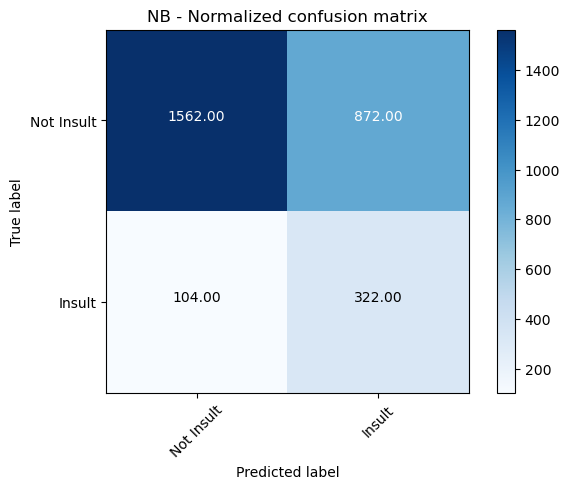

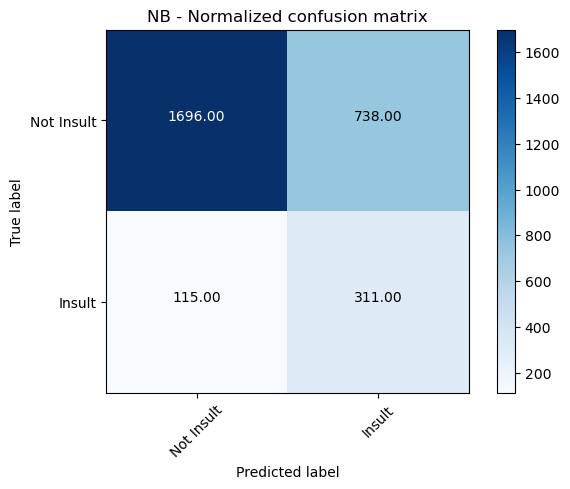

MultinomialNB (Words Gram): ROC Curve
MultinomialNB AUC (Word Gram): 0.7847324290856065


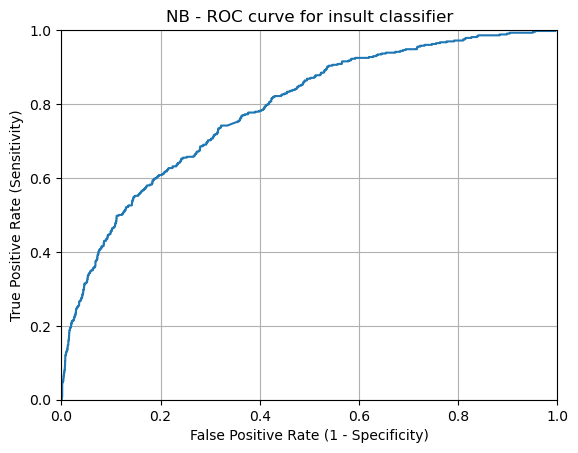

MultinomialNB (Character Gram): ROC Curve
MultinomialNB AUC (Character Gram): 0.7900551074179947


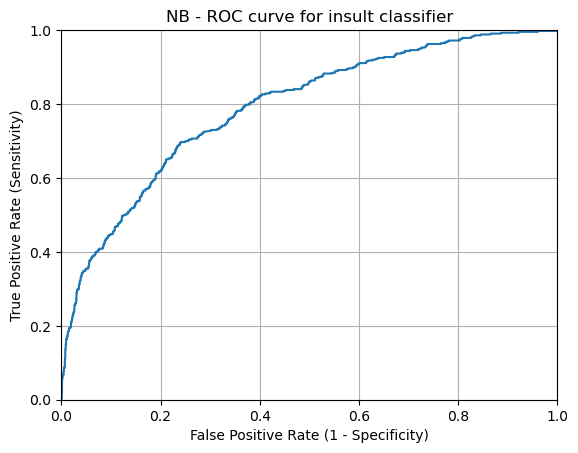

Starting SVM Classifier


D:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Program Files\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC (SVM) (Word Gram): 0.7213286713286713
LinearSVC (SVM) (Character Gram): 0.7618881118881119
LinearSVC (SVM) (Word Gram): Confusion matrix, without normalization
LinearSVC (SVM) (Character Gram): Confusion matrix, without normalization


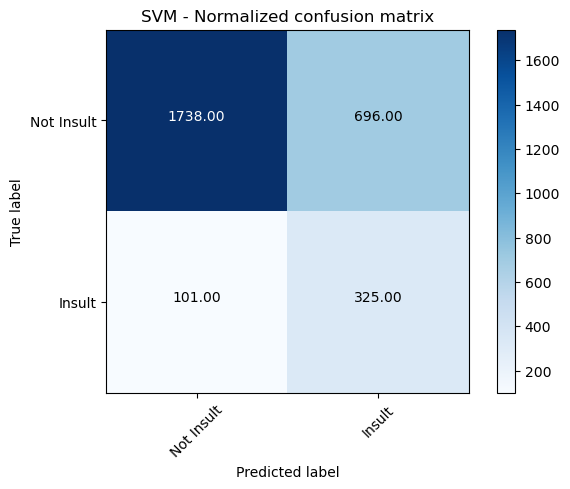

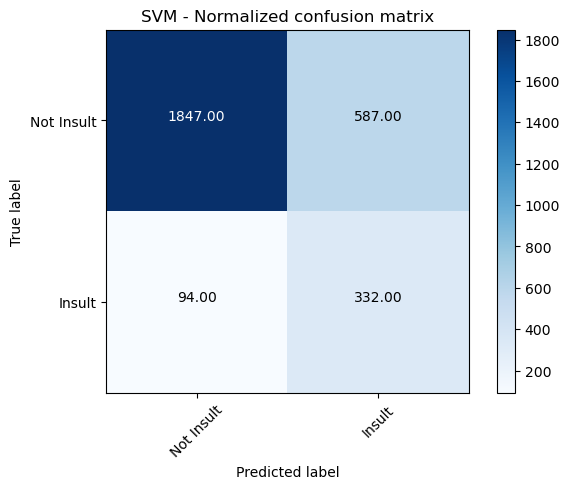

Starting Logistic Regression
Logistic Regression (Word Gram): 0.7143356643356643
Logistic Regression (Character Gram): 0.7538461538461538
Logistic Regression (Word Gram): Confusion matrix, without normalization
Logistic Regression (Character Gram): Confusion matrix, without normalization


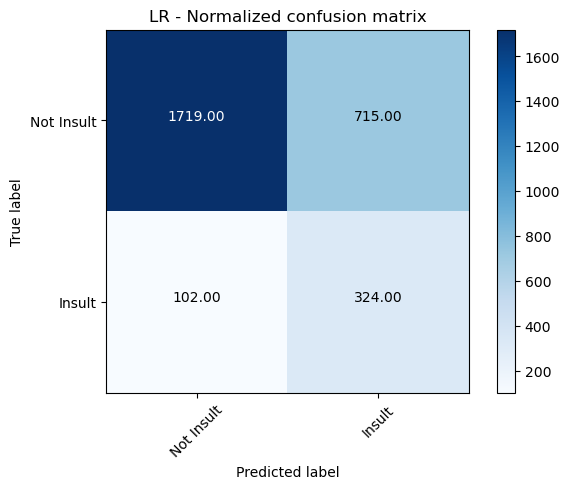

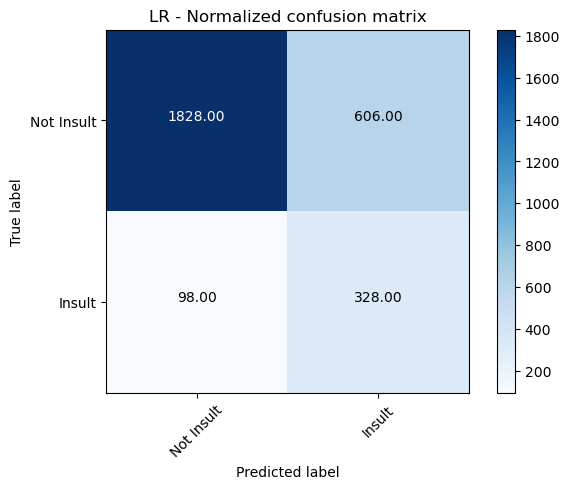

Logistic Regression (Word Gram): ROC Curve
LogisticRegression AUC (Word Gram): 0.8133566532032513


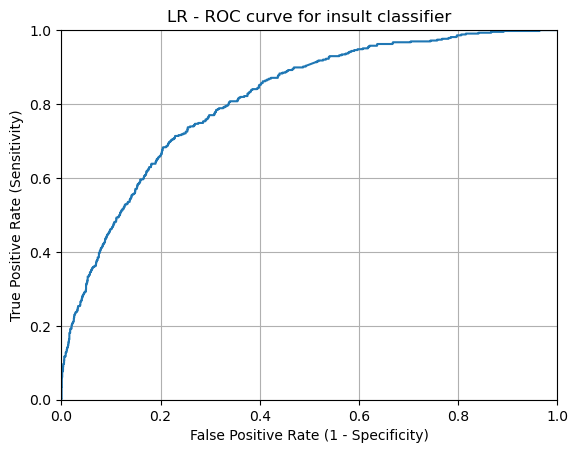

Logistic Regression (Character Gram): ROC Curve
LogisticRegression AUC (Character Gram): 0.840834172385725


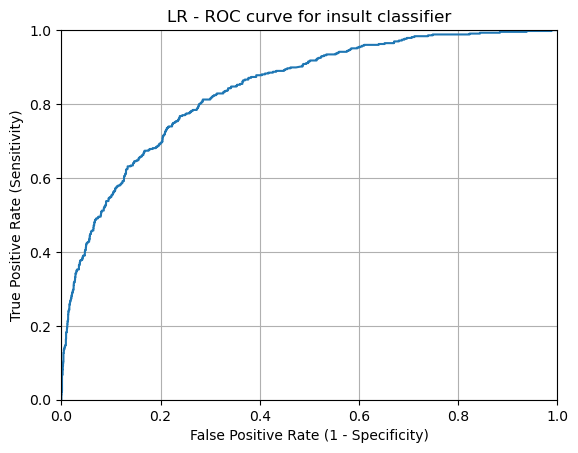

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import roc_auc_score, roc_curve

import pandas as pd
import numpy as np
import spacy


# Processed Data
full_df = process_comment(comments)
verify_df = pd.read_csv('dataset\impermium_verification_labels.csv')
pdata = pd.concat([full_df, verify_df], ignore_index=True)


nlp = spacy.load('en_core_web_sm')


def sanitize_wo_stopwords(sentence):    # Sanitize sentences to remove stop words
    doc = nlp(sentence)
    s = []
    for token in doc:
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)


# pdata.Comment = [sanitize_wo_stopwords(x[1: -1]) for x in pdata.Comment]
pdata.Comment = [x[1: -1] for x in pdata.Comment]   # Removing double quotes from start and end


# Balancing train data to perform better training
pdata_ni = pdata.query('Insult == 0')
pdata_i = pdata.query('Insult == 1')


ptrain_ni, ptest_ni = train_test_split(pdata_ni, test_size=0.6)

ptrain_i, ptest_i = train_test_split(pdata_i, test_size=0.2)


# Splitting Dataset
ptrain = pd.concat([ptrain_i, ptrain_ni], ignore_index=True)
ptest = pd.concat([ptest_i, ptest_ni], ignore_index=True)


"""
    Feature Extraction
"""

# TFIDF as feature
tfidf_w = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', use_idf=False, max_features=50000) 
tfidf_c = TfidfVectorizer(ngram_range=(3, 10), analyzer='char', use_idf=False, max_features=100000)

ptrain_data_w = tfidf_w.fit_transform(ptrain.Comment)
ptrain_data_c = tfidf_c.fit_transform(ptrain.Comment)


"""
    Classification of Insult
"""
# Helper Functions
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):   # Source: not our team
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


"""
    Multinomial Naive Bayes
    with Accuracy, Confusion Matrices
"""

print('Starting MultinomialNB Classifier')
insult_nb_w = MultinomialNB(alpha=0.01)
insult_nb_w.fit(ptrain_data_w, ptrain.Insult)

insult_nb_c = MultinomialNB(alpha=0.01)
insult_nb_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_nb_w = insult_nb_w.predict(ptest_data_w)
predicted_nb_c = insult_nb_c.predict(ptest_data_c)
print('Naive Bayes (Word Gram):', np.mean(predicted_nb_w == ptest.Insult))
print('Naive Bayes (Character Gram):', np.mean(predicted_nb_c == ptest.Insult))

predicted_nb_w_prob = insult_nb_w.predict_proba(ptest_data_w)
predicted_nb_c_prob = insult_nb_c.predict_proba(ptest_data_c)


# #### Confusion Matrix for NB Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_nb_w)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('Naive Bayes (Word): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='NB - Normalized confusion matrix')


# Confusion Matrix for NB Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_nb_c)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('Naive Bayes (Character): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='NB - Normalized confusion matrix')
plt.show()

# ROC Curve and AUC for NB Classifier on Word- N-grams
print('MultinomialNB (Words Gram): ROC Curve')
print('MultinomialNB AUC (Word Gram):', roc_auc_score(ptest.Insult, predicted_nb_w_prob[:, 1:]))
fpr, tpr, _ = roc_curve(ptest.Insult, predicted_nb_w_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('NB - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

# ROC Curve and AUC for NB Classifier on Character- N-grams
print('MultinomialNB (Character Gram): ROC Curve')
print('MultinomialNB AUC (Character Gram):', roc_auc_score(ptest.Insult, predicted_nb_c_prob[:, 1:]))
fpr, tpr, _ = roc_curve(ptest.Insult, predicted_nb_c_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('NB - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


"""
    LinearSVC
    with Accuracy, Confusion Matrices
"""

print('Starting SVM Classifier')

insult_svm_w = LinearSVC()
insult_svm_w.fit(ptrain_data_w, ptrain.Insult)

insult_svm_c = LinearSVC()
insult_svm_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_svm_w = insult_svm_w.predict(ptest_data_w)
predicted_svm_c = insult_svm_c.predict(ptest_data_c)
print('LinearSVC (SVM) (Word Gram):', np.mean(predicted_svm_w == ptest.Insult))
print('LinearSVC (SVM) (Character Gram):', np.mean(predicted_svm_c == ptest.Insult))


# Confusion Matrix for SVM Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_svm_w)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('LinearSVC (SVM) (Word Gram): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='SVM - Normalized confusion matrix')


# Confusion Matrix for SVM Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_svm_c)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
print('LinearSVC (SVM) (Character Gram): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='SVM - Normalized confusion matrix')
plt.show()


"""
    Logistic Regression
    with Accuracy, Confusion Matrices, ROC Curves, AUC scores
"""

print('Starting Logistic Regression')

insult_lr_w = LogisticRegression()
insult_lr_w.fit(ptrain_data_w, ptrain.Insult)

insult_lr_c = LogisticRegression()
insult_lr_c.fit(ptrain_data_c, ptrain.Insult)

ptest_data_w = tfidf_w.transform(ptest.Comment)
ptest_data_c = tfidf_c.transform(ptest.Comment)

predicted_lr_w = insult_lr_w.predict(ptest_data_w)
predicted_lr_c = insult_lr_c.predict(ptest_data_c)
print('Logistic Regression (Word Gram):', np.mean(predicted_lr_w == ptest.Insult))
print('Logistic Regression (Character Gram):', np.mean(predicted_lr_c == ptest.Insult))

predicted_lr_w_prob = insult_lr_w.predict_proba(ptest_data_w)
predicted_lr_c_prob = insult_lr_c.predict_proba(ptest_data_c)


# Confusion Matrix for Logistic Regression Classifier on Word - N-grams
cnf_matrix_w = confusion_matrix(ptest.Insult, predicted_lr_w)
np.set_printoptions(precision=2)
plt.figure()
print('Logistic Regression (Word Gram): ', end='')
plot_confusion_matrix(cnf_matrix_w, classes=['Not Insult', 'Insult'],
                      title='LR - Normalized confusion matrix')


# Confusion Matrix for Logistic Regression Classifier on Character - N-grams
cnf_matrix_c = confusion_matrix(ptest.Insult, predicted_lr_c)
np.set_printoptions(precision=2)
plt.figure()
print('Logistic Regression (Character Gram): ', end='')
plot_confusion_matrix(cnf_matrix_c, classes=['Not Insult', 'Insult'],
                      title='LR - Normalized confusion matrix')
plt.show()


# ROC Curve and AUC for Logistic Regression Classifier on Word - N-grams
print('Logistic Regression (Word Gram): ROC Curve')
print('LogisticRegression AUC (Word Gram):', roc_auc_score(ptest.Insult, predicted_lr_w_prob[:, 1:]))

fpr, tpr, _ = roc_curve(ptest.Insult, predicted_lr_w_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('LR - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()


# ROC Curve and AUC for Logistic Regression Classifier on Character - N-grams
print('Logistic Regression (Character Gram): ROC Curve')
print('LogisticRegression AUC (Character Gram):', roc_auc_score(ptest.Insult, predicted_lr_c_prob[:, 1:]))

fpr, tpr, _ = roc_curve(ptest.Insult, predicted_lr_c_prob[:, 1:])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('LR - ROC curve for insult classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

A function that detects if the text is an insult or not

In [31]:
def classify_insult(text, model, tfidf_vectorizer):
    # Preprocess the text (sanitize_wo_stopwords function)
    preprocessed_text = sanitize_wo_stopwords(text)

    # Extract TF-IDF features for the preprocessed text
    text_features = tfidf_vectorizer.transform([preprocessed_text])

    # Predict with probabilities using the provided model
    predicted_probabilities = model.predict_proba(text_features)

    # Predict the class label (0 for not an insult, 1 for insult)
    predicted_label = model.predict(text_features)

    # Return both the label and the probabilities
    return {
        "label": predicted_label[0],
        "probabilities": predicted_probabilities[0]
    }

# Example usage:
text_to_classify = "faggot"
result = classify_insult(text_to_classify, insult_nb_w, tfidf_w)

if result["label"] == 1:
    print("The text is an insult.")
else:
    print("The text is not an insult.")

# Print the probability scores for both classes
insult_probability = result["probabilities"][1]  # Probability of being an insult
not_insult_probability = result["probabilities"][0]  # Probability of not being an insult

print(f"Insult Probability: {insult_probability}")
print(f"Not Insult Probability: {not_insult_probability}")


The text is an insult.
Insult Probability: 0.9515718979020676
Not Insult Probability: 0.0484281020979322


Ensemble

In [32]:
!pip install tensorflow

Epoch 1/7
104/104 [==============================] - 15s 112ms/step - loss: 0.6917 - accuracy: 0.5653 - val_loss: 0.6962 - val_accuracy: 0.4983
Epoch 2/7
104/104 [==============================] - 10s 94ms/step - loss: 0.6000 - accuracy: 0.8387 - val_loss: 0.6545 - val_accuracy: 0.6381
Epoch 3/7
104/104 [==============================] - 9s 86ms/step - loss: 0.1712 - accuracy: 0.9687 - val_loss: 0.7105 - val_accuracy: 0.6916
Epoch 4/7
104/104 [==============================] - 9s 88ms/step - loss: 0.0292 - accuracy: 0.9937 - val_loss: 0.7314 - val_accuracy: 0.7101
Epoch 5/7
104/104 [==============================] - 9s 88ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.7771 - val_accuracy: 0.7119
Epoch 6/7
104/104 [==============================] - 10s 96ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.8117 - val_accuracy: 0.7140
Epoch 7/7
104/104 [==============================] - 9s 89ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.6980 - val_accuracy: 0.7643


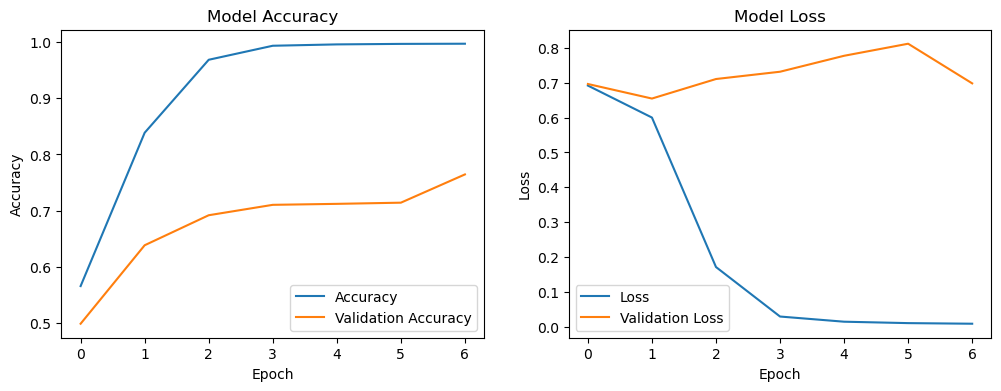

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the required Spacy model
nlp = spacy.load('en_core_web_sm')

def sanitize_wo_stopwords(sentence):
    doc = nlp(sentence)
    s = []
    for token in doc:
        if str(token.pos_) != 'SPACE' and not token.is_stop:
            s.append(token.text)
    return ' '.join(s)

def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

def train_insult_model():
    # Processed Data
    full_df = process_comment(comments)  # Assuming you have a function process_comment
    verify_df = pd.read_csv('dataset\impermium_verification_labels.csv')
    pdata = pd.concat([full_df, verify_df], ignore_index=True)

    # Preprocess the comments
    pdata.Comment = [x[1: -1] for x in pdata.Comment]
    
    pdata_ni = pdata.query('Insult == 0')
    pdata_i = pdata.query('Insult == 1')

    ptrain_ni, ptest_ni = train_test_split(pdata_ni, test_size=0.6)
    ptrain_i, ptest_i = train_test_split(pdata_i, test_size=0.2)

    ptrain = pd.concat([ptrain_i, ptrain_ni], ignore_index=True)
    ptest = pd.concat([ptest_i, ptest_ni], ignore_index=True)

    # Create the ensemble model
    pipe_svm_w = Pipeline([
        ('tfidf_w', TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)),
        ('svm_w', LogisticRegression()),
    ])

    pipe_lr_w = Pipeline([
        ('tfidf_w', TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)),
        ('lr_w', LogisticRegression()),
    ])

    vote_clf = VotingClassifier(
        estimators=[
            ('svm_w', pipe_svm_w),
            ('lr_w', pipe_lr_w),
        ],
        voting='soft'
    )

    # Preprocess the data for the neural network
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), use_idf=False, analyzer='word', max_features=50000)
    X_train = tfidf_vectorizer.fit_transform(ptrain.Comment)
    X_test = tfidf_vectorizer.transform(ptest.Comment)
    y_train = ptrain.Insult
    y_test = ptest.Insult

    # Create and train a simple neural network
    model = create_model(X_train.shape[1])
    history = model.fit(X_train.toarray(), y_train, validation_data=(X_test.toarray(), y_test), epochs=7, batch_size=32, verbose=1)

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    def predict_insult(text):
        preprocessed_text = sanitize_wo_stopwords(text)
        X_text = tfidf_vectorizer.transform([preprocessed_text])
        logits = model.predict(X_text)[0][0]
        probability = 1 / (1 + np.exp(-logits))  # Apply the sigmoid function
        return logits, probability
    return model, predict_insult

# Train the insult prediction model
trained_model, predict_insult = train_insult_model()



In [39]:
# Now you can use predict_insult to predict insults and get probability estimates
text_to_predict = "faggot"

is_insult, probabilities = predict_insult(text_to_predict)
print(f"Is Insult: {is_insult}")
print(f"Probabilities: {probabilities}")


1/1 [==============================] - 0s 23ms/step
Is Insult: 0.9806779026985168
Probabilities: 0.7272427153559157
